In [747]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

In [748]:
df = pd.read_csv('~/github_personal/poonamgaikar01/Linear_regression/all_cars_data.csv')
# df_sedan = pd.read_csv('~/github_personal/poonamgaikar01/Linear_regression/sedan_data.csv')

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12889 entries, 0 to 12888
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12889 non-null  object
 1   year            12889 non-null  int64 
 2   miles           12889 non-null  object
 3   price           12889 non-null  object
 4   transmission    12889 non-null  object
 5   fuel_type       12889 non-null  object
 6   drivetrain      12889 non-null  object
 7   exterior_color  12889 non-null  object
 8   vin             12889 non-null  object
 9   mpg             913 non-null    object
 10  engine          12889 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [750]:
## Dropping mpg as most of values are NULL
df1=df.drop('mpg', axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12889 entries, 0 to 12888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12889 non-null  object
 1   year            12889 non-null  int64 
 2   miles           12889 non-null  object
 3   price           12889 non-null  object
 4   transmission    12889 non-null  object
 5   fuel_type       12889 non-null  object
 6   drivetrain      12889 non-null  object
 7   exterior_color  12889 non-null  object
 8   vin             12889 non-null  object
 9   engine          12889 non-null  object
dtypes: int64(1), object(9)
memory usage: 1007.1+ KB


In [751]:
df1.head()

,vehicle_name,year,miles,price,transmission,fuel_type,drivetrain,exterior_color,vin,engine
0,Dodge Journey R/T,2016,"140,218","12,997",Automatic,Gasoline,All-wheel Drive,Billet Silver Metallic Clearcoat,3C4PDDEG2GT227364,3.6L V6 24V MPFI DOHC
1,Jeep Patriot Sport,2016,"100,663","13,352",Automatic,Gasoline,Front-wheel Drive,Black Clearcoat,1C4NJPBA4GD769220,2.0L I4 16V MPFI DOHC
2,Nissan Juke S,2016,"94,671","13,491",Automatic CVT,Gasoline,AWD,Pearl White,JN8AF5MV8GT654361,1.6L I4 16V GDI DOHC Turbo
3,Nissan Rogue S,2016,"119,916","13,499",Automatic CVT,Gasoline,Front-wheel Drive,Glacier White,5N1AT2MT6GC743651,2.5L I4 16V MPFI DOHC
4,FIAT 500X Trekking,2016,"47,950","14,151",9-Speed Automatic,Gasoline,Front-wheel Drive,Red Tri-Coat,ZFBCFXCT1GP357329,2.4L I4 16V MPFI SOHC


In [752]:
#Checking for any null values
df1.isnull().sum()

vehicle_name      0
year              0
miles             0
price             0
transmission      0
fuel_type         0
drivetrain        0
exterior_color    0
vin               0
engine            0
dtype: int64

In [753]:
# There are some cars which are not priced, removing them
df2=df1[df1["price"] != "Not Priced"]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12806 entries, 0 to 12888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12806 non-null  object
 1   year            12806 non-null  int64 
 2   miles           12806 non-null  object
 3   price           12806 non-null  object
 4   transmission    12806 non-null  object
 5   fuel_type       12806 non-null  object
 6   drivetrain      12806 non-null  object
 7   exterior_color  12806 non-null  object
 8   vin             12806 non-null  object
 9   engine          12806 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


# Cleaning Price and Miles column

In [754]:
#Removing , from price and miles and converting to int
df2["price"] = (df2["price"].str.replace("$", "").str.replace(",","").astype(int))
df2["miles"] = (df["miles"].str.replace(",","").astype(int))
df2.head(5)

,vehicle_name,year,miles,price,transmission,fuel_type,drivetrain,exterior_color,vin,engine
0,Dodge Journey R/T,2016,140218,12997,Automatic,Gasoline,All-wheel Drive,Billet Silver Metallic Clearcoat,3C4PDDEG2GT227364,3.6L V6 24V MPFI DOHC
1,Jeep Patriot Sport,2016,100663,13352,Automatic,Gasoline,Front-wheel Drive,Black Clearcoat,1C4NJPBA4GD769220,2.0L I4 16V MPFI DOHC
2,Nissan Juke S,2016,94671,13491,Automatic CVT,Gasoline,AWD,Pearl White,JN8AF5MV8GT654361,1.6L I4 16V GDI DOHC Turbo
3,Nissan Rogue S,2016,119916,13499,Automatic CVT,Gasoline,Front-wheel Drive,Glacier White,5N1AT2MT6GC743651,2.5L I4 16V MPFI DOHC
4,FIAT 500X Trekking,2016,47950,14151,9-Speed Automatic,Gasoline,Front-wheel Drive,Red Tri-Coat,ZFBCFXCT1GP357329,2.4L I4 16V MPFI SOHC


In [755]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12806 entries, 0 to 12888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12806 non-null  object
 1   year            12806 non-null  int64 
 2   miles           12806 non-null  int64 
 3   price           12806 non-null  int64 
 4   transmission    12806 non-null  object
 5   fuel_type       12806 non-null  object
 6   drivetrain      12806 non-null  object
 7   exterior_color  12806 non-null  object
 8   vin             12806 non-null  object
 9   engine          12806 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


In [756]:
# Extracting Car Brand name from 'vehicle_name' column and putting it into a new column called 'brand'

def extract_brand(x):
    return x.split(' ')[0]

df2['brand'] = df2['vehicle_name'].apply(lambda x:x.split(' ')[0])

df2.head()

,vehicle_name,year,miles,price,transmission,fuel_type,drivetrain,exterior_color,vin,engine,brand
0,Dodge Journey R/T,2016,140218,12997,Automatic,Gasoline,All-wheel Drive,Billet Silver Metallic Clearcoat,3C4PDDEG2GT227364,3.6L V6 24V MPFI DOHC,Dodge
1,Jeep Patriot Sport,2016,100663,13352,Automatic,Gasoline,Front-wheel Drive,Black Clearcoat,1C4NJPBA4GD769220,2.0L I4 16V MPFI DOHC,Jeep
2,Nissan Juke S,2016,94671,13491,Automatic CVT,Gasoline,AWD,Pearl White,JN8AF5MV8GT654361,1.6L I4 16V GDI DOHC Turbo,Nissan
3,Nissan Rogue S,2016,119916,13499,Automatic CVT,Gasoline,Front-wheel Drive,Glacier White,5N1AT2MT6GC743651,2.5L I4 16V MPFI DOHC,Nissan
4,FIAT 500X Trekking,2016,47950,14151,9-Speed Automatic,Gasoline,Front-wheel Drive,Red Tri-Coat,ZFBCFXCT1GP357329,2.4L I4 16V MPFI SOHC,FIAT


In [757]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12806 entries, 0 to 12888
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12806 non-null  object
 1   year            12806 non-null  int64 
 2   miles           12806 non-null  int64 
 3   price           12806 non-null  int64 
 4   transmission    12806 non-null  object
 5   fuel_type       12806 non-null  object
 6   drivetrain      12806 non-null  object
 7   exterior_color  12806 non-null  object
 8   vin             12806 non-null  object
 9   engine          12806 non-null  object
 10  brand           12806 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.2+ MB


# Cleaning and adding engine_volume

In [758]:
#######################Adding Engine_volume###########################################
#Here, the engine volume is part of engine columns, the first part. However, in some cases, it is in middle.
df2[~df2.engine.str.match('^[(0,1,2,3,4,5,6,7,8,9)]')].head(5)

,vehicle_name,year,miles,price,transmission,fuel_type,drivetrain,exterior_color,vin,engine,brand
9,Jeep Patriot Sport,2016,97441,14999,Variable,Gasoline,Front-wheel Drive,Black Clearcoat,1C4NJPBA6GD743217,Regular Unleaded I-4 2.0 L/122,Jeep
10,Mitsubishi Eclipse Cross ES,2019,90682,15499,Variable,Gasoline,Four-wheel Drive,Red Diamond,JA4AT3AA8KZ037973,Intercooled Turbo Regular Unleaded I-4 1.5 L/91,Mitsubishi
18,Nissan Rogue S,2016,85943,15999,Variable,Gasoline,All-wheel Drive,Arctic Blue Metallic,JN8AT2MV0GW135567,Regular Unleaded I-4 2.5 L/152,Nissan
20,Dodge Journey SE,2016,90864,15999,Automatic,Gasoline,All-wheel Drive,White,3C4PDDAG1GT242329,Regular Unleaded V-6 3.6 L/220,Dodge
22,Mitsubishi Outlander Sport ES,2016,61171,16499,Variable,Gasoline,Four-wheel Drive,Rally Red Metallic,JA4AR3AW6GZ055910,Regular Unleaded I-4 2.4 L/144,Mitsubishi


In [759]:
# Dropping cars with engine type as Electric. Count is 400 and since there is no way to estimate the engine volume
df3 = df2[df2["engine"]!="Electric"]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12488 entries, 0 to 12888
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12488 non-null  object
 1   year            12488 non-null  int64 
 2   miles           12488 non-null  int64 
 3   price           12488 non-null  int64 
 4   transmission    12488 non-null  object
 5   fuel_type       12488 non-null  object
 6   drivetrain      12488 non-null  object
 7   exterior_color  12488 non-null  object
 8   vin             12488 non-null  object
 9   engine          12488 non-null  object
 10  brand           12488 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [760]:
#Also, dropping following engine types as they do not have engine volumes attach
f=df3["engine"].isin(['HYBRID', 'V6', 'FCV', 'I-4 cyl', 'V-8 cyl', 'V-6 cyl','V6 Cylinder Engine','I4','I4 Supercharged'])
df4=df3[~f]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 12888
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12388 non-null  object
 1   year            12388 non-null  int64 
 2   miles           12388 non-null  int64 
 3   price           12388 non-null  int64 
 4   transmission    12388 non-null  object
 5   fuel_type       12388 non-null  object
 6   drivetrain      12388 non-null  object
 7   exterior_color  12388 non-null  object
 8   vin             12388 non-null  object
 9   engine          12388 non-null  object
 10  brand           12388 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [761]:
#For engine with value "-", replacing it with the mean which is 4

df4.loc[df4['engine'] == "–", 'engine'] = "4.0L"

# Removing 1 car with the following engine volume.

df5 = df4[df4.engine != '3ZR-FAE']
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 0 to 12888
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vehicle_name    12387 non-null  object
 1   year            12387 non-null  int64 
 2   miles           12387 non-null  int64 
 3   price           12387 non-null  int64 
 4   transmission    12387 non-null  object
 5   fuel_type       12387 non-null  object
 6   drivetrain      12387 non-null  object
 7   exterior_color  12387 non-null  object
 8   vin             12387 non-null  object
 9   engine          12387 non-null  object
 10  brand           12387 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [762]:
df5.head()

,vehicle_name,year,miles,price,transmission,fuel_type,drivetrain,exterior_color,vin,engine,brand
0,Dodge Journey R/T,2016,140218,12997,Automatic,Gasoline,All-wheel Drive,Billet Silver Metallic Clearcoat,3C4PDDEG2GT227364,3.6L V6 24V MPFI DOHC,Dodge
1,Jeep Patriot Sport,2016,100663,13352,Automatic,Gasoline,Front-wheel Drive,Black Clearcoat,1C4NJPBA4GD769220,2.0L I4 16V MPFI DOHC,Jeep
2,Nissan Juke S,2016,94671,13491,Automatic CVT,Gasoline,AWD,Pearl White,JN8AF5MV8GT654361,1.6L I4 16V GDI DOHC Turbo,Nissan
3,Nissan Rogue S,2016,119916,13499,Automatic CVT,Gasoline,Front-wheel Drive,Glacier White,5N1AT2MT6GC743651,2.5L I4 16V MPFI DOHC,Nissan
4,FIAT 500X Trekking,2016,47950,14151,9-Speed Automatic,Gasoline,Front-wheel Drive,Red Tri-Coat,ZFBCFXCT1GP357329,2.4L I4 16V MPFI SOHC,FIAT


In [763]:
# Extracting engine volume from the engine column.

import re
count={}

def extract_engine_volume(x):
    if not x[0].isnumeric():
        try:
            v=re.findall('[0-9].[0-9] ?L',x)[0]
            #print(x,v)
        except:
            #print(f"NOTMATCHED {x}")
            try:
                v=re.findall('[0-9].[0-9]L|[0-9].[0-9]/|[0-9].[0-9] TFSI',x)[0]
            except:
                if x in count:
                    count[x] +=1
                else:
                    count[x] = 1
    else:
        v=x.split(" ")[0]
    
    return v
    
print(count)
df5['engine_volume']=df5['engine'].apply(extract_engine_volume)

{}


In [764]:
df5.groupby(['engine_volume'])['engine_volume'].count()

engine_volume
1.0 L     2
1.0L     48
1.2 L     1
1.2L     11
1.3/      1
         ..
6.4 L    12
6.4L     36
6.6L      3
6.8L      1
8        34
Name: engine_volume, Length: 80, dtype: int64

In [765]:
# Extracting only the volume in litres
df5['engine_volume'] = df5['engine_volume'].apply(lambda x: x.split('L')[0])
df5['engine_volume'] = df5['engine_volume'].apply(lambda x: x.split('/')[0])
df5['engine_volume'] = df5['engine_volume'].apply(lambda x: x.split('TFSI')[0])

In [766]:

#The engine_volume is still of type object (string). Need to convert that to float

df5['engine_volume'] = df5['engine_volume'].astype(float)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 0 to 12888
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vehicle_name    12387 non-null  object 
 1   year            12387 non-null  int64  
 2   miles           12387 non-null  int64  
 3   price           12387 non-null  int64  
 4   transmission    12387 non-null  object 
 5   fuel_type       12387 non-null  object 
 6   drivetrain      12387 non-null  object 
 7   exterior_color  12387 non-null  object 
 8   vin             12387 non-null  object 
 9   engine          12387 non-null  object 
 10  brand           12387 non-null  object 
 11  engine_volume   12387 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


In [767]:
df5['engine_volume'].describe()

count   12387.000
mean        2.737
std         1.042
min         1.000
25%         2.000
50%         2.500
75%         3.500
max         8.000
Name: engine_volume, dtype: float64

# Dropping Unwanted Columns

In [768]:
# As most of MPG is null dropping it. Also, this is not applicable to Hybrid and electric
# As we have already extracted brand from vehicle name, dropping that column as well
# As VIN served its purpose in identigying duplicates, dropping it
# As we have extracted engine_volume from engine, dropping it,
# Exterior_color has high cardinality which is not going to affect the price of car. Dropping it
df6=df5.drop(columns=['vehicle_name','vin','engine','exterior_color'],axis=1)


In [769]:
# Confirming the datafrom after dropping column. We still have 5126 entries.
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12387 non-null  int64  
 1   miles          12387 non-null  int64  
 2   price          12387 non-null  int64  
 3   transmission   12387 non-null  object 
 4   fuel_type      12387 non-null  object 
 5   drivetrain     12387 non-null  object 
 6   brand          12387 non-null  object 
 7   engine_volume  12387 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 871.0+ KB


# Cleaning and encoding transmission column

In [770]:
######### Cleaning and encoding transmission column#########
df6.transmission.unique()

array(['Automatic', 'Automatic CVT', '9-Speed Automatic',
       '6-Speed Automatic', 'Variable',
       '7-Speed Automatic with Auto-Shift', '6-Speed Manual',
       'Automatic Xtronic CVT', '6-Speed Automatic with Auto-Shift',
       'Manual', '4-Speed Automatic', '8-Speed Automatic', 'IVT',
       '6-Speed Automatic with Tiptronic', 'CVT', '6-SPEED AUTOMATIC',
       '7-Speed Automatic', '6-Speed Automatic Electronic with Overdrive',
       'CVT Transmission', 'Continuously Variable Transmission',
       'CVT with Xtronic', '6 Speed Elect Controlled Auto Transmission',
       '1-Speed Automatic', '–', '9-Speed 948TE Automatic',
       '5-Speed Automatic', '8-SPEED AUTOMATIC',
       '8 SPEED AUTOMATIC TRANSMISSION', '10-Speed Automatic',
       '10 Speed Automatic', '6-Speed A/T', '8-Speed A/T',
       '8 Speed Elect Controlled Auto Transmission w/Inte.',
       '6 Speed Automatic', '9 Speed Automatic', 'PRIOR RENTAL',
       '8-Speed Automatic with Auto-Shift', 'Automatic Lineartro

In [771]:
df6.groupby(['transmission'])['transmission'].count()

transmission
1-Speed Automatic               8
1-Speed CVT with Overdrive      1
10 Speed Automatic             28
10-SPEED AUTOMATIC              6
10-Speed Automatic            127
                             ... 
Manual                         41
Other                           1
PRIOR RENTAL                    1
Variable                      175
–                              43
Name: transmission, Length: 62, dtype: int64

In [772]:
# All of the following are of Type CVT, hence changing them to 0 CVT
df6=df6.replace(to_replace=["Automatic","Automatic CVT","Automatic Lineartronic CVT","Automatic Xtronic CVT",
                           "Automatic with Geartronic","CVT","CVT Transmission",
                           "CVT with Xtronic","Continuously Variable Transmission","IVT","Variable","eCVT","–"],
            value="0 CVT")

In [773]:
df6.head(5)

,year,miles,price,transmission,fuel_type,drivetrain,brand,engine_volume
0,2016,140218,12997,0 CVT,Gasoline,All-wheel Drive,Dodge,3.600
1,2016,100663,13352,0 CVT,Gasoline,Front-wheel Drive,Jeep,2.000
2,2016,94671,13491,0 CVT,Gasoline,AWD,Nissan,1.600
3,2016,119916,13499,0 CVT,Gasoline,Front-wheel Drive,Nissan,2.500
4,2016,47950,14151,9-Speed Automatic,Gasoline,Front-wheel Drive,FIAT,2.400


In [774]:
## Removing PRIOPR RENTAL and Manual as they are only 5 count
df6 = df6[df6.transmission != 'Manual']
df6 = df6[df6.transmission != 'PRIOR RENTAL']
df6 = df6[df6.transmission != 'Other']

In [775]:
df6=df6.dropna()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12344 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12344 non-null  int64  
 1   miles          12344 non-null  int64  
 2   price          12344 non-null  int64  
 3   transmission   12344 non-null  object 
 4   fuel_type      12344 non-null  object 
 5   drivetrain     12344 non-null  object 
 6   brand          12344 non-null  object 
 7   engine_volume  12344 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 867.9+ KB


In [776]:

# Encoding CVT to 0 and 1 to 6 as 6 and 7 - 8 as 8 and 9-10 as 10
def encode_transmission(x):
    try:
        if "-" in x:
            t=x.split("-")[0]
        else:
            t=x.split(" ")[0]

        if t in ["0"]:
            return 0

        if t in ["1","4","5","6"]:
            return 6
        if t in ["7","7 speed automatic with auto","8"]:
            return 8
        if t in ["9","10"]:
            return 10
    except:
        print(x)

df6['transmission'] = df6['transmission'].apply(encode_transmission)
df6.groupby(['transmission'])['transmission'].count()

transmission
0.000     4126
6.000     3668
8.000     3538
10.000     987
Name: transmission, dtype: int64

In [777]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12344 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12344 non-null  int64  
 1   miles          12344 non-null  int64  
 2   price          12344 non-null  int64  
 3   transmission   12319 non-null  float64
 4   fuel_type      12344 non-null  object 
 5   drivetrain     12344 non-null  object 
 6   brand          12344 non-null  object 
 7   engine_volume  12344 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 867.9+ KB


In [778]:
df7=df6.dropna()
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12319 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12319 non-null  int64  
 1   miles          12319 non-null  int64  
 2   price          12319 non-null  int64  
 3   transmission   12319 non-null  float64
 4   fuel_type      12319 non-null  object 
 5   drivetrain     12319 non-null  object 
 6   brand          12319 non-null  object 
 7   engine_volume  12319 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 866.2+ KB


# Cleaning and Hot encoding fuel_type

In [779]:
df7.groupby(['fuel_type']).size()

fuel_type
B                     9
Diesel               63
E85 Flex Fuel       262
Flexible Fuel        14
Gasoline          11118
Hybrid              475
–                   378
dtype: int64

In [780]:
# Following value_encoding here: https://medium.com/analytics-vidhya/used-cars-price-estimation-a-regression-model-f91d9c26d102

#E85, flexible fuel are or type Gasoline. Also, –  will be likely Gasoline as that is the maximum type
df7=df7.replace(to_replace=['Gasoline ', 'E85 Flex Fuel ', 'Flexible Fuel ','– ' ],value="0")
df7=df7.replace(to_replace=['Hybrid ', 'B '],value="1")

df7=df7.replace(to_replace=['Diesel '],value="2")
df7.head(5)

,year,miles,price,transmission,fuel_type,drivetrain,brand,engine_volume
0,2016,140218,12997,0.000,0,All-wheel Drive,Dodge,3.600
1,2016,100663,13352,0.000,0,Front-wheel Drive,Jeep,2.000
2,2016,94671,13491,0.000,0,AWD,Nissan,1.600
3,2016,119916,13499,0.000,0,Front-wheel Drive,Nissan,2.500
4,2016,47950,14151,10.000,0,Front-wheel Drive,FIAT,2.400


In [781]:
df7.groupby(['fuel_type']).size()

fuel_type
0    11772
1      484
2       63
dtype: int64

In [782]:
#fueltype_dummies=pd.get_dummies(df7.fuel_type)

In [783]:
# fueltype_dummies.head()

In [784]:
# df7= pd.concat([df7,fueltype_dummies.drop('Diesel',axis='columns')],axis='columns')
df7['fuel_type'] = df7['fuel_type'].astype(float)
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12319 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12319 non-null  int64  
 1   miles          12319 non-null  int64  
 2   price          12319 non-null  int64  
 3   transmission   12319 non-null  float64
 4   fuel_type      12319 non-null  float64
 5   drivetrain     12319 non-null  object 
 6   brand          12319 non-null  object 
 7   engine_volume  12319 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 866.2+ KB


In [785]:
df7.head()

,year,miles,price,transmission,fuel_type,drivetrain,brand,engine_volume
0,2016,140218,12997,0.000,0.000,All-wheel Drive,Dodge,3.600
1,2016,100663,13352,0.000,0.000,Front-wheel Drive,Jeep,2.000
2,2016,94671,13491,0.000,0.000,AWD,Nissan,1.600
3,2016,119916,13499,0.000,0.000,Front-wheel Drive,Nissan,2.500
4,2016,47950,14151,10.000,0.000,Front-wheel Drive,FIAT,2.400


In [786]:
# Since we have hot encoded brand, we can drop that column
# df7=df7.drop('fuel_type',axis='columns')

In [787]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12319 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12319 non-null  int64  
 1   miles          12319 non-null  int64  
 2   price          12319 non-null  int64  
 3   transmission   12319 non-null  float64
 4   fuel_type      12319 non-null  float64
 5   drivetrain     12319 non-null  object 
 6   brand          12319 non-null  object 
 7   engine_volume  12319 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 866.2+ KB


# Cleaning and encoding drivetrain

In [788]:
########################## Cleaning and enconding drivetrain###################################
df7.groupby(['drivetrain']).size()


drivetrain
 4WD                                                    53
 AWD                                                   138
 All-Wheel Drive                                         1
 All-Wheel Drive with Locking Differential               1
 All-wheel Drive                                      3367
 FWD                                                   325
 Four-wheel Drive                                      994
 Front-Wheel Drive with Limited-Slip Differential        1
 Front-wheel Drive                                    5168
 RWD                                                    83
 Rear Wheel Drive                                        1
 Rear-wheel Drive                                     1774
 –                                                     413
dtype: int64

In [789]:
df7.drivetrain.unique()

array([' All-wheel Drive ', ' Front-wheel Drive ', ' AWD ',
       ' Four-wheel Drive ', ' FWD ', ' 4WD ', ' Rear-wheel Drive ',
       ' – ', ' RWD ', ' All-Wheel Drive with Locking Differential ',
       ' Front-Wheel Drive with Limited-Slip Differential ',
       ' Rear Wheel Drive ', ' All-Wheel Drive '], dtype=object)

In [790]:
df7[df.drivetrain==" FWD "]

,year,miles,price,transmission,fuel_type,drivetrain,brand,engine_volume
65,2016,53707,17998,10.000,0.000,FWD,FIAT,2.400
103,2016,139290,18981,10.000,0.000,FWD,Acura,3.500
105,2017,74159,18990,0.000,0.000,FWD,Nissan,2.000
177,2016,78643,19998,6.000,0.000,FWD,Ford,2.000
314,2017,68537,21626,6.000,0.000,FWD,GMC,2.400
...,...,...,...,...,...,...,...,...
12808,2015,65082,15745,6.000,0.000,FWD,Hyundai,2.400
12828,2015,65082,15745,6.000,0.000,FWD,Hyundai,2.400
12848,2015,65082,15745,6.000,0.000,FWD,Hyundai,2.400
12868,2015,65082,15745,6.000,0.000,FWD,Hyundai,2.400


In [791]:
# 4WD, Four-wheel drive can be encoded as 4
# AWD, All-WheelDrive can be encoded as 5
# FWD, Front-Wheel Deive can be encoded as 1
# Rear and RWD can be encoded as 2
df7=df7.replace(to_replace=[' Four-wheel Drive ',' 4WD '],value=4)
df7=df7.replace(to_replace=[' All-wheel Drive ',' AWD ',' All-Wheel Drive ',' All-Wheel Drive with Locking Differential '],value=5)
df7=df7.replace(to_replace=[' Front-wheel Drive ',' FWD ',' Front-Wheel Drive with Limited-Slip Differential '],value=1)
df7=df7.replace(to_replace=[ ' Rear-wheel Drive ',' – ', ' RWD ',' Rear Wheel Drive '],value=2)
df7.head(5)

,year,miles,price,transmission,fuel_type,drivetrain,brand,engine_volume
0,2016,140218,12997,0.000,0.000,5,Dodge,3.600
1,2016,100663,13352,0.000,0.000,1,Jeep,2.000
2,2016,94671,13491,0.000,0.000,5,Nissan,1.600
3,2016,119916,13499,0.000,0.000,1,Nissan,2.500
4,2016,47950,14151,10.000,0.000,1,FIAT,2.400


In [792]:
df7.groupby(['drivetrain']).size()

drivetrain
1    5494
2    2271
4    1047
5    3507
dtype: int64

In [793]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12319 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12319 non-null  int64  
 1   miles          12319 non-null  int64  
 2   price          12319 non-null  int64  
 3   transmission   12319 non-null  float64
 4   fuel_type      12319 non-null  float64
 5   drivetrain     12319 non-null  int64  
 6   brand          12319 non-null  object 
 7   engine_volume  12319 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 866.2+ KB


## We have too many brands. Dropping brands(make) with cars less than 50

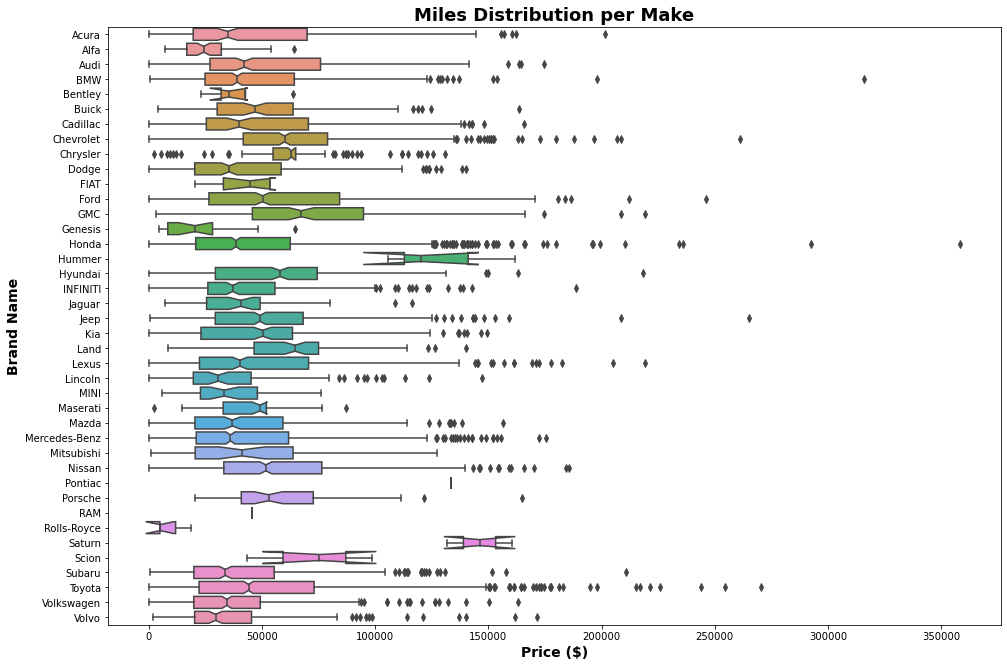

In [794]:
#Looking at per brand to miles comparision

fig = plt.figure(figsize=(16,11))
ax = fig.gca()
sns.boxplot(x='miles',y='brand',data=df7,
            order=sorted(df7.brand.unique()),notch=True,orient='h')
plt.xlabel('Price ($)',fontsize=14,fontweight="bold")
plt.ylabel('Brand Name',fontsize=14,fontweight="bold")
plt.title('Miles Distribution per Make',fontsize=18,fontweight="bold")
plt.show()

In [795]:
###############Cleaning up by brand########################
def find_brands_less_than(x):
    print(x)

df7.groupby(['brand'])['brand'].agg('count') < 50

brand
Acura            False
Alfa             False
Audi             False
BMW              False
Bentley           True
Buick            False
Cadillac         False
Chevrolet        False
Chrysler         False
Dodge            False
FIAT              True
Ford             False
GMC              False
Genesis           True
Honda            False
Hummer            True
Hyundai          False
INFINITI         False
Jaguar           False
Jeep             False
Kia              False
Land             False
Lexus            False
Lincoln          False
MINI              True
Maserati         False
Mazda            False
Mercedes-Benz    False
Mitsubishi        True
Nissan           False
Pontiac           True
Porsche          False
RAM               True
Rolls-Royce       True
Saturn            True
Scion             True
Subaru           False
Toyota           False
Volkswagen       False
Volvo            False
Name: brand, dtype: bool

In [796]:
car_brand_mask= (
    (df7["brand"] == "Chrysler") |
    (df7["brand"] == "FIAT") |
    (df7["brand"] == "Genesis") |
    (df7["brand"] == "Jaguar") |
    (df7["brand"] == "Land") |
    (df7["brand"] == "MINI") |
    (df7["brand"] == "Maserati") |
    (df7["brand"] == "Mitsubishi") |
    (df7["brand"] == "Porsche") |
    (df7["brand"] == "RAM") |
    (df7["brand"] == "Rolls-Royce") |
    (df7["brand"] == "Scion") |
    (df7["brand"] == "Bentley") |
    (df7["brand"] == "Hummer") |
    (df7["brand"] == "Pontiac") |
    (df7["brand"] == "Saturn") 
    
)

df8=df7[~car_brand_mask]

In [797]:
df8.groupby(['brand'])['brand'].agg('count')

brand
Acura             305
Alfa               74
Audi              466
BMW               834
Buick             111
Cadillac          167
Chevrolet         571
Dodge             301
Ford              871
GMC               192
Honda            1175
Hyundai           369
INFINITI          281
Jeep              563
Kia               264
Lexus             529
Lincoln            87
Mazda             305
Mercedes-Benz    1044
Nissan            674
Subaru            463
Toyota           1501
Volkswagen        474
Volvo             177
Name: brand, dtype: int64

In [798]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11798 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11798 non-null  int64  
 1   miles          11798 non-null  int64  
 2   price          11798 non-null  int64  
 3   transmission   11798 non-null  float64
 4   fuel_type      11798 non-null  float64
 5   drivetrain     11798 non-null  int64  
 6   brand          11798 non-null  object 
 7   engine_volume  11798 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 829.5+ KB


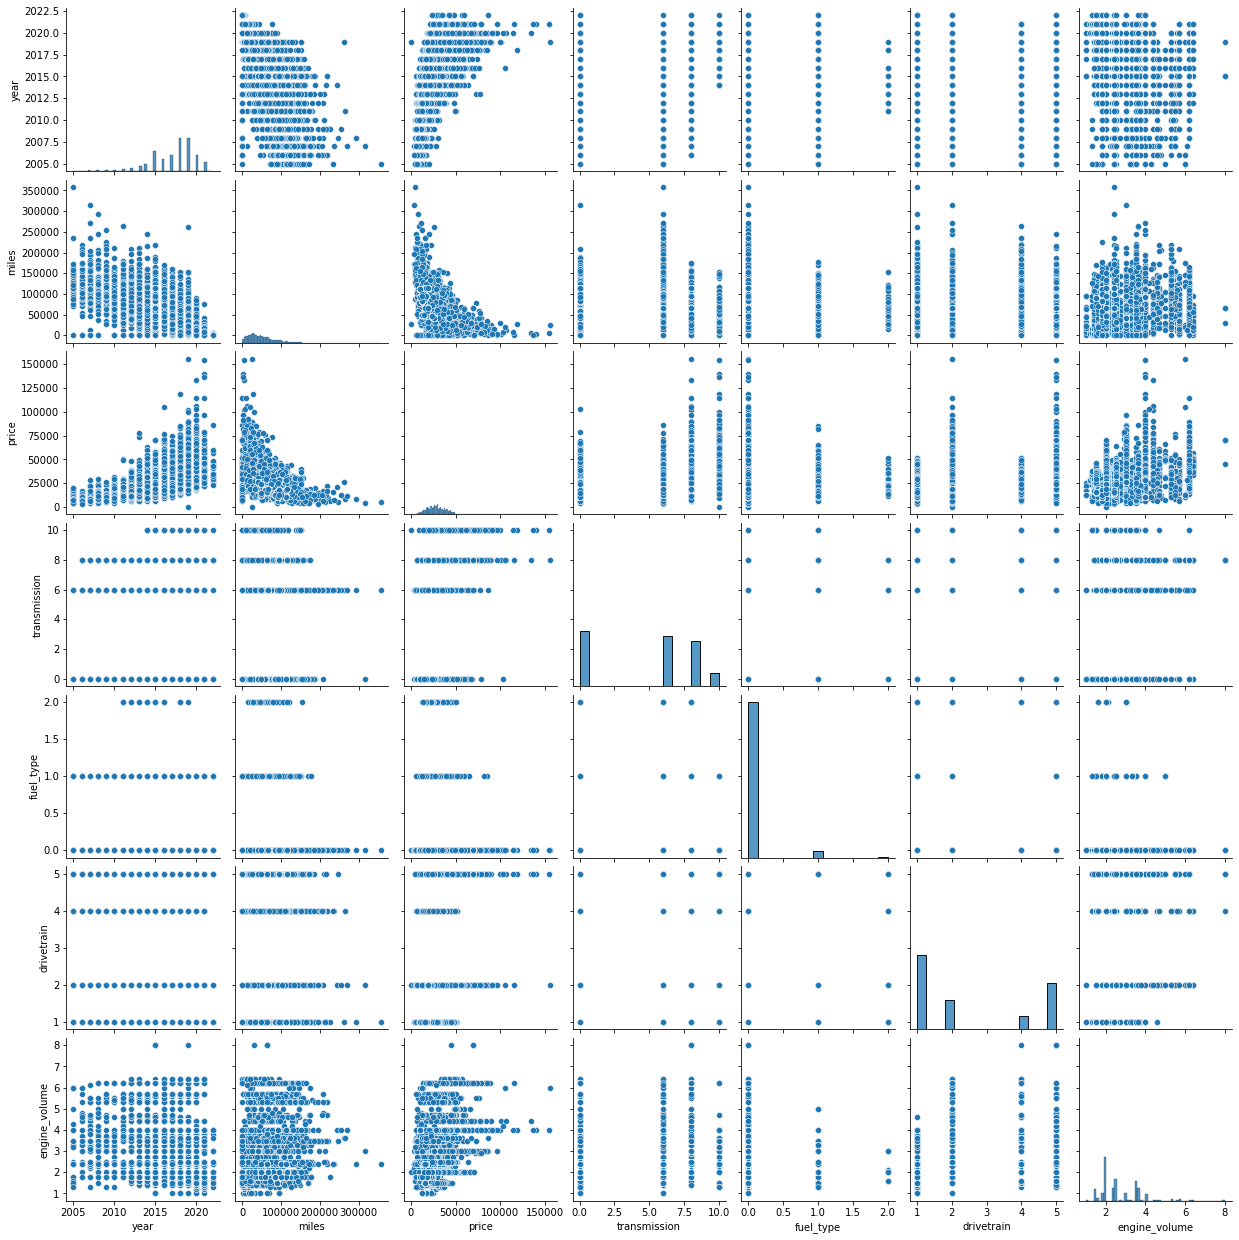

In [799]:
sns.pairplot(df8)
plt.show()

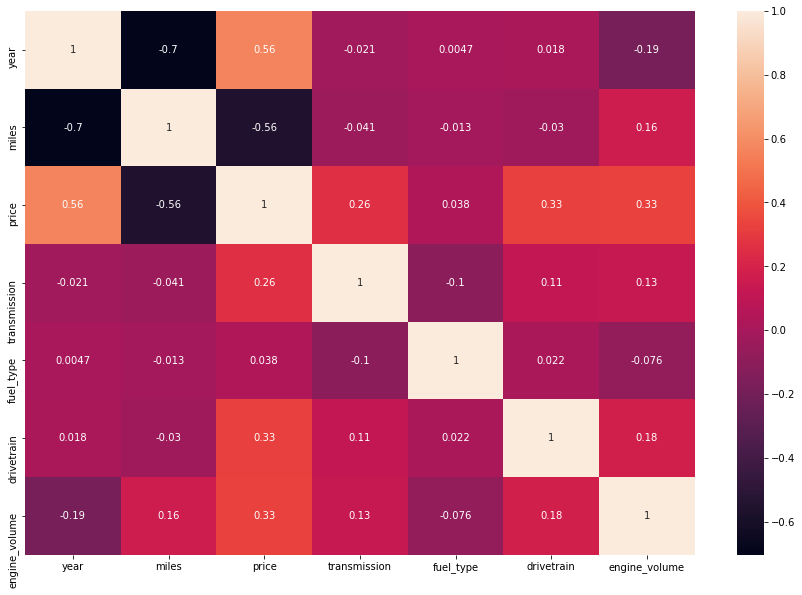

In [800]:
# heatmap to show the correlation beyween all numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(df8.corr(),annot=True)
plt.show()

In [801]:
df8.year.unique()
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11798 entries, 0 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           11798 non-null  int64  
 1   miles          11798 non-null  int64  
 2   price          11798 non-null  int64  
 3   transmission   11798 non-null  float64
 4   fuel_type      11798 non-null  float64
 5   drivetrain     11798 non-null  int64  
 6   brand          11798 non-null  object 
 7   engine_volume  11798 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 829.5+ KB


In [803]:
variables = df8[[ 'miles', 'transmission','drivetrain','fuel_type','year']]
vif_df = pd.DataFrame(variables.columns.values, columns = ['Feature'])
vif_df['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_df

,Feature,VIF
0,miles,3.040
1,transmission,2.853
2,drivetrain,3.202
3,fuel_type,1.056
4,year,6.937


# Dealing with outliers 

Seaborn determines outliers based on the interquartile range (IQR). By default, Seaborn classifies any point above or below 1.5*IQR as outliers.

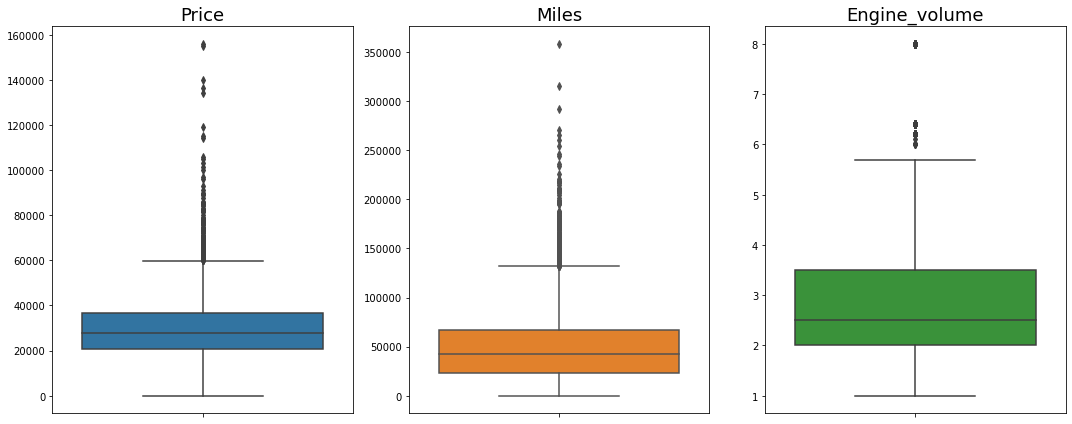

In [805]:
#Below box plot show the outliers.
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = df8.price, ax = ax1, color = 'tab:blue')
ax1.set_title('Price', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = df8.miles, ax = ax2, color = 'tab:orange')
ax2.set_title('Miles', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = df8.engine_volume, ax = ax3, color = 'tab:green')
ax3.set_title('Engine_volume', fontsize = 18)
ax3.set_ylabel(None)
plt.show()


In [806]:
#As we can see below, fuel_type and miles has lot of outliers with points below 1.5* IQR
q3 = df8.quantile(0.75)
q1 = df8.quantile(0.25) 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((df8 < minm) | (df8 > (maxm))).sum())

brand              0
drivetrain         0
engine_volume    183
fuel_type        526
miles            299
price            167
transmission       0
year             216
dtype: int64


In [807]:
df9 = df8[~((df8 < minm) | (df8 > maxm)).any(axis=1)]

In [808]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 1 to 12888
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10582 non-null  int64  
 1   miles          10582 non-null  int64  
 2   price          10582 non-null  int64  
 3   transmission   10582 non-null  float64
 4   fuel_type      10582 non-null  float64
 5   drivetrain     10582 non-null  int64  
 6   brand          10582 non-null  object 
 7   engine_volume  10582 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 744.0+ KB


In [809]:
data_dummies = pd.get_dummies(df9.brand)

In [810]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 1 to 12888
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Acura          10582 non-null  uint8
 1   Alfa           10582 non-null  uint8
 2   Audi           10582 non-null  uint8
 3   BMW            10582 non-null  uint8
 4   Buick          10582 non-null  uint8
 5   Cadillac       10582 non-null  uint8
 6   Chevrolet      10582 non-null  uint8
 7   Dodge          10582 non-null  uint8
 8   Ford           10582 non-null  uint8
 9   GMC            10582 non-null  uint8
 10  Honda          10582 non-null  uint8
 11  Hyundai        10582 non-null  uint8
 12  INFINITI       10582 non-null  uint8
 13  Jeep           10582 non-null  uint8
 14  Kia            10582 non-null  uint8
 15  Lexus          10582 non-null  uint8
 16  Lincoln        10582 non-null  uint8
 17  Mazda          10582 non-null  uint8
 18  Mercedes-Benz  10582 non-null  uint8
 19  Niss

In [811]:
data_dummies.head()

,Acura,Alfa,Audi,BMW,Buick,Cadillac,Chevrolet,Dodge,Ford,GMC,...,Kia,Lexus,Lincoln,Mazda,Mercedes-Benz,Nissan,Subaru,Toyota,Volkswagen,Volvo
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [812]:
df10= pd.concat([df9,data_dummies.drop('Lincoln',axis='columns')],axis='columns')
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 1 to 12888
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10582 non-null  int64  
 1   miles          10582 non-null  int64  
 2   price          10582 non-null  int64  
 3   transmission   10582 non-null  float64
 4   fuel_type      10582 non-null  float64
 5   drivetrain     10582 non-null  int64  
 6   brand          10582 non-null  object 
 7   engine_volume  10582 non-null  float64
 8   Acura          10582 non-null  uint8  
 9   Alfa           10582 non-null  uint8  
 10  Audi           10582 non-null  uint8  
 11  BMW            10582 non-null  uint8  
 12  Buick          10582 non-null  uint8  
 13  Cadillac       10582 non-null  uint8  
 14  Chevrolet      10582 non-null  uint8  
 15  Dodge          10582 non-null  uint8  
 16  Ford           10582 non-null  uint8  
 17  GMC            10582 non-null  uint8  
 18  Honda 

In [813]:
# Since we have hot encoded brand, we can drop that column
df11=df10.drop('brand',axis='columns')

In [742]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 1 to 12888
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10696 non-null  int64  
 1   miles          10696 non-null  int64  
 2   price          10696 non-null  int64  
 3   transmission   10696 non-null  float64
 4   fuel_type      10696 non-null  float64
 5   drivetrain     10696 non-null  int64  
 6   Acura          10696 non-null  uint8  
 7   Alfa           10696 non-null  uint8  
 8   Audi           10696 non-null  uint8  
 9   BMW            10696 non-null  uint8  
 10  Buick          10696 non-null  uint8  
 11  Cadillac       10696 non-null  uint8  
 12  Chevrolet      10696 non-null  uint8  
 13  Dodge          10696 non-null  uint8  
 14  Ford           10696 non-null  uint8  
 15  GMC            10696 non-null  uint8  
 16  Honda          10696 non-null  uint8  
 17  Hyundai        10696 non-null  uint8  
 18  INFINI

In [743]:
df11.head(5)

,year,miles,price,transmission,fuel_type,drivetrain,Acura,Alfa,Audi,BMW,...,Jeep,Kia,Lexus,Mazda,Mercedes-Benz,Nissan,Subaru,Toyota,Volkswagen,Volvo
1,2016,100663,13352,0.000,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2016,94671,13491,0.000,0.000,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016,119916,13499,0.000,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2016,125582,14441,0.000,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2016,64283,14891,6.000,0.000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Training Model using OLS

In [744]:
y = df11['price']
x = df11.drop(['price'], axis =1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 1 to 12888
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10696 non-null  int64  
 1   miles          10696 non-null  int64  
 2   transmission   10696 non-null  float64
 3   fuel_type      10696 non-null  float64
 4   drivetrain     10696 non-null  int64  
 5   Acura          10696 non-null  uint8  
 6   Alfa           10696 non-null  uint8  
 7   Audi           10696 non-null  uint8  
 8   BMW            10696 non-null  uint8  
 9   Buick          10696 non-null  uint8  
 10  Cadillac       10696 non-null  uint8  
 11  Chevrolet      10696 non-null  uint8  
 12  Dodge          10696 non-null  uint8  
 13  Ford           10696 non-null  uint8  
 14  GMC            10696 non-null  uint8  
 15  Honda          10696 non-null  uint8  
 16  Hyundai        10696 non-null  uint8  
 17  INFINITI       10696 non-null  uint8  
 18  Jeep  

In [745]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [746]:
x_train_df = pd.DataFrame(x_train, columns = x.columns.values)
X_train = sm.add_constant(x_train_df)
sm_model = sm.OLS(y_train,X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     536.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:51:58   Log-Likelihood:                -86545.
No. Observations:                8556   AIC:                         1.731e+05
Df Residuals:                    8528   BIC:                         1.733e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.279e+06   7.69e+04    -42.621

## Note: We got r2 and adj-r2 as: 0.769 and 0.768 resp

# Model Analysis using SKlearn

In [520]:
model = LinearRegression().fit(x_train, y_train)

sklearn does not show above kind of table with summary of r2. We'll use sklearn's score() method to calculate the R-squared, and then use that R-squared value to manually calculate the Adjusted R-squared.

In [521]:
R2 = round(model.score(x_train, y_train), 3)
R2_adj = round(1 - (1-R2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),3)
intercept = model.intercept_.round(4)
coeff = model.coef_.round(4)

In [522]:
R = pd.DataFrame({'Metric':['R-squared','Adj. R-squared'], 'Score': [R2, R2_adj]})
R

,Metric,Score
0,R-squared,0.658
1,Adj. R-squared,0.657


## The r2 and adj r2 scores are exactly matching with the OLS model which is good thing.

# Evaluating the model using training data

In [499]:
y_hat_train = model.predict(x_train)

In [500]:
#  Residual is calculated as Predicted - Observed. Abs. Error is simply the absolute value of the Residual.
eval_df_train = pd.DataFrame({'Predicted': y_hat_train, 
                              'Observed': y_train, 
                              'Residual': y_hat_train - y_train,
                              'Abs. Error': np.abs(y_hat_train - y_train)
                             }
)

Let's take a look at the describe of eval_df_train. We can see the mean Residual is 0.000 (-4.5504431997750966e-10) which is great. This means that on average, the difference between our predicted values and the observed values is roughly zero. The Mean Absolute Error (MAE) is 3562.

In [501]:
pd.set_option('display.float_format', '{:.3f}'.format)
eval_df_train.describe()

,Predicted,Observed,Residual,Abs. Error
count,8465.000,8465.000,8465.000,8465.000
mean,28846.265,28846.265,0.000,3575.702
std,8531.477,9720.452,4658.443,2985.621
min,152.185,1.000,-24731.798,0.017
25%,23156.238,20999.000,-2698.092,1357.272
50%,29630.243,27999.000,253.060,2871.595
75%,35270.776,35983.000,3047.551,4971.202
max,50913.649,59584.000,37075.112,37075.112


In [502]:
eval_df_train['Residual'].mean()

1.0561957136808735e-11

In addition to the R-squared, the Adjusted R-squared values, and the Mean Absolute Error, we will also include the Root Mean Squared Error (RMSE) to help us evaluate our model. We'd want both the MAE and the RMSE to be as low as possible. So far, our numbers our telling us that we have a relatively good model

In [503]:
MAE = mean_absolute_error(y_train, y_hat_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_hat_train))

metrics_train = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics_train

,Metric,Score
0,R-squared,0.770
1,Adj. R-squared,0.769
2,MAE,3575.702
3,RMSE,4658.168


Let's generate some visualizations to help us understand our model even more. The following is a scatter plot of the predicted values on the y-axis and the observed values on the x-axis. Ideally, we would want the points to form along a 45-degree line.

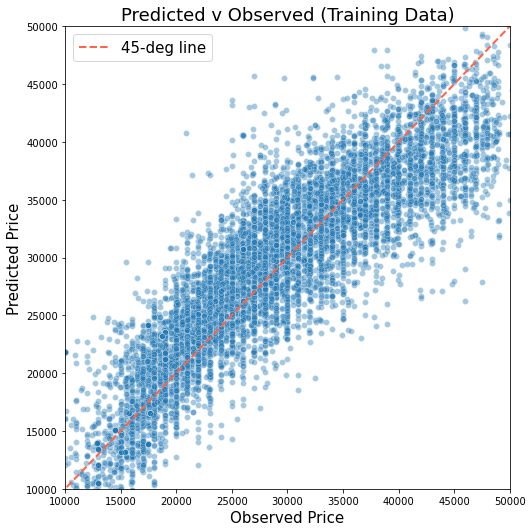

In [504]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = y_hat_train, alpha = 0.4, color = 'tab:blue')
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.xlim(10000,50000)
plt.ylim(10000,50000)
plt.title('Predicted v Observed (Training Data)', fontsize = 18)
plt.plot([0, 50000], [0, 50000], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

In the above diagram, we can see most of the data points are along the 45 degree line which is good.
1. Most points do form along this 45-degree line.
2. The points tend to be more scattered in 20k to 30k price range.
3. Some of the over-predictions in the lower price range are quite large.
4. The model almost always under-predict in the higher price range (observer Price > 45k).
5. The model tend to perform really well in the middle price range (Observed Price < 30k).
6. Our model tend to underpredict overall. ( More data points below the 45 degree line)


The following is a scatterplot of the Absolute Error vs the Observed Price. The plot supports some of the observations we made.

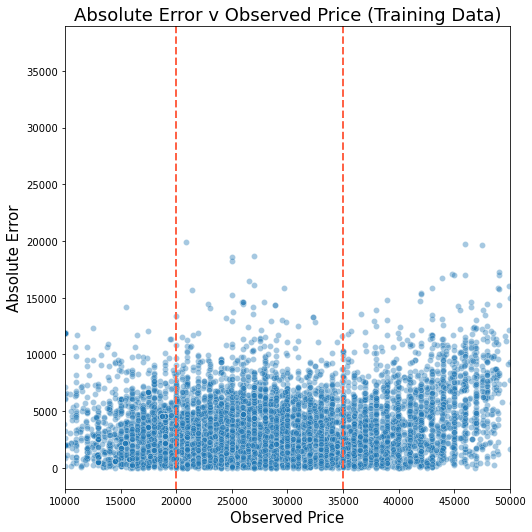

In [505]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = eval_df_train['Abs. Error'], alpha = 0.4, color = 'tab:blue')
plt.axvline(x = 35000, ls = '--', lw = 2, color = 'tomato', label = '11')
plt.axvline(x = 20000, ls = '--', lw = 2, color = 'tomato', label = '9')
plt.title('Absolute Error v Observed Price (Training Data)', fontsize = 18)
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Absolute Error', fontsize = 15)
plt.xlim(10000,50000)
plt.show()

## Residual analysis for trained model

The following is a distribution plot of the the Residuals. We can see that the Residuals are centered around zero. This confirms our finding about the mean Residual value earlier.

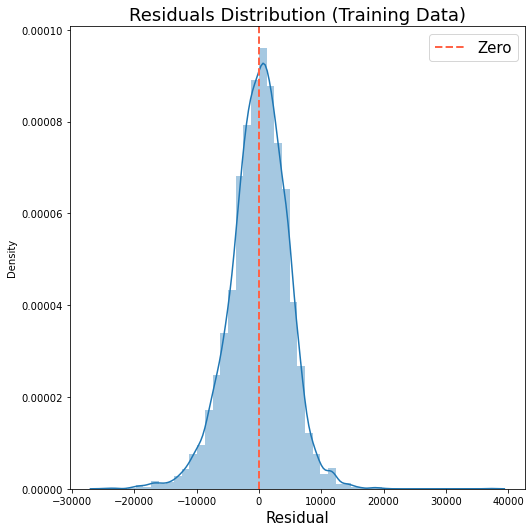

In [506]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Distribution (Training Data)', fontsize = 18)
plt.xlabel('Residual', fontsize = 15)
sns.distplot(eval_df_train.Residual, color = 'tab:blue')
plt.axvline(x = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15)
plt.show()

## As we can see, the residuals are following the normal distribution graph with a mean 0.Now, make sure that the residuals are not following any specific pattern.


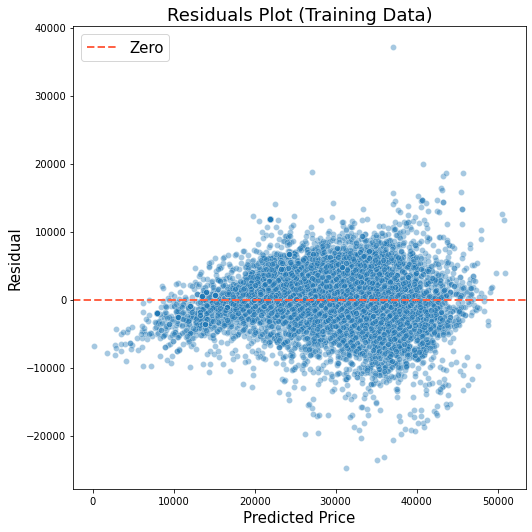

In [507]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Plot (Training Data)', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
sns.scatterplot(x = y_hat_train, y = eval_df_train.Residual, alpha = 0.4, color = 'tab:blue')
plt.axhline(y = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15, loc = 'upper left')
plt.show()

Here, we can see that the residuals are high for 30k >. This means that the predictions for this range seems to be inaccurate

# Predictions on the Test data or Evaluating(Testing) the model

Now that we have thoroughly described our model, it is time to use it on the testing data! Let's see if the observations we made still hold. First we'll use our model to make predictions on the test data. We will then generate the same tables and scatterplots from before and compare the results.

In [508]:
#Making Predictions
y_hat = model.predict(x_test)

In [509]:
eval_df = pd.DataFrame({'Predicted': y_hat, 
                        'Observed': y_test, 
                        'Residual': y_hat - y_test, 
                        'Abs. Error': np.abs(y_hat - y_test)})

The descriptives are very similar to the descriptives from the training data. The main difference we can see is the value of the mean_Residual. Earlier, we had a mean_Residual of 0.000. With the testing data, we found our mean Residual to be 151.533. This quite a large number relative to the previous value, but still a small number overall.

In [510]:
eval_df.describe()

,Predicted,Observed,Residual,Abs. Error
count,2117.000,2117.000,2117.000,2117.000
mean,28928.888,28895.574,33.314,3682.709
std,8630.407,9749.809,4734.142,2973.963
min,248.191,6795.000,-23881.341,0.321
25%,22923.087,21017.000,-2699.773,1516.031
50%,29836.498,28181.000,234.998,3012.288
75%,35444.066,35968.000,3271.597,5114.028
max,48598.617,59392.000,22140.701,23881.341


In [511]:
R2 = model.score(x_test, y_test)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))

metrics = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics

,Metric,Score
0,R-squared,0.764
1,Adj. R-squared,0.761
2,MAE,3682.709
3,RMSE,4733.141


## The r2 value of train was 0.771
## The r2 value of test is 0.763

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.


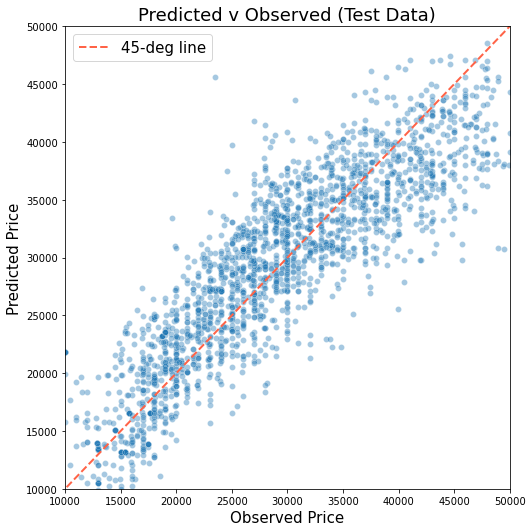

In [512]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = y_hat, alpha = 0.4, color = 'tab:blue')
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.xlim(10000,50000)
plt.ylim(10000,50000)
plt.title('Predicted v Observed (Test Data)', fontsize = 18)
plt.plot([0, 50000], [0, 50000], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

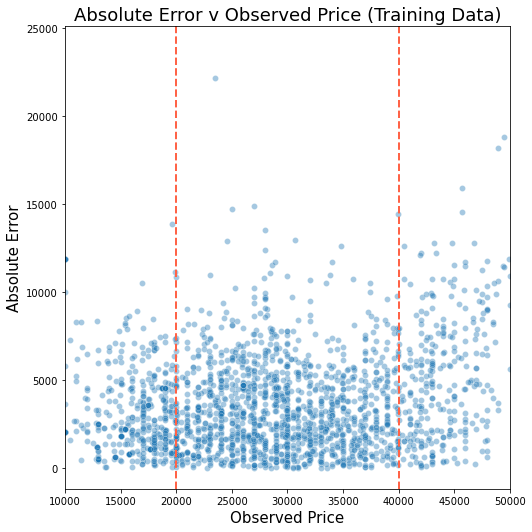

In [513]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = eval_df['Abs. Error'], alpha = 0.4, color = 'tab:blue')
plt.axvline(x = 40000, ls = '--', lw = 2, color = 'tomato', label = '11')
plt.axvline(x = 20000, ls = '--', lw = 2, color = 'tomato', label = '9')
plt.title('Absolute Error v Observed Price (Training Data)', fontsize = 18)
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Absolute Error', fontsize = 15)
plt.xlim(10000,50000)
plt.show()

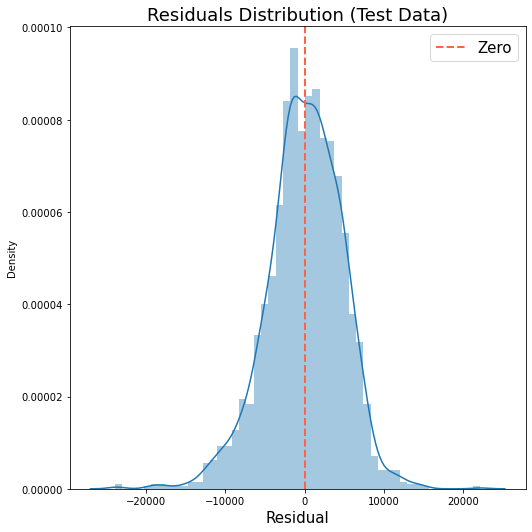

In [514]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Distribution (Test Data)', fontsize = 18)
plt.xlabel('Residual', fontsize = 15)
sns.distplot(eval_df.Residual, color = 'tab:blue')
plt.axvline(x = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15)
plt.show()

The residual on test is of same shape as that of train.

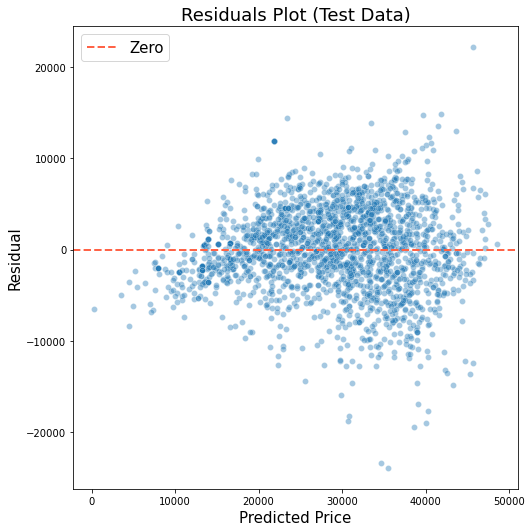

In [515]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Plot (Test Data)', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
sns.scatterplot(x = y_hat, y = eval_df.Residual, alpha = 0.4, color = 'tab:blue')
plt.axhline(y = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15, loc = 'upper left')
plt.show()

In [ ]:
model.predict([[2018,30000,0.000,0,1,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])